<a href="https://colab.research.google.com/github/sandbox259/Mentally/blob/main/Mental.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import randint

# prep
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.datasets import make_classification
from sklearn.preprocessing import binarize, LabelEncoder, MinMaxScaler

# models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

# Validation libraries
from sklearn import metrics
from sklearn.metrics import accuracy_score, mean_squared_error, precision_recall_curve
from sklearn.model_selection import cross_val_score

#Neural Network
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV

#Bagging
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

#Naive bayes
from sklearn.naive_bayes import GaussianNB

#Stacking
from mlxtend.classifier import StackingClassifier



In [3]:
frame = pd.read_csv('/survey.csv')
print(frame.shape)
print(frame.describe())
print(frame.info())

(1259, 27)
                Age
count  1.259000e+03
mean   7.942815e+07
std    2.818299e+09
min   -1.726000e+03
25%    2.700000e+01
50%    3.100000e+01
75%    3.600000e+01
max    1.000000e+11
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-n

In [4]:
total = frame.isnull().sum().sort_values(ascending=False)
percent = (frame.isnull().sum()/frame.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
print(missing_data)

                           Total   Percent
comments                    1095  0.869738
state                        515  0.409055
work_interfere               264  0.209690
self_employed                 18  0.014297
seek_help                      0  0.000000
obs_consequence                0  0.000000
mental_vs_physical             0  0.000000
phys_health_interview          0  0.000000
mental_health_interview        0  0.000000
supervisor                     0  0.000000
coworkers                      0  0.000000
phys_health_consequence        0  0.000000
mental_health_consequence      0  0.000000
leave                          0  0.000000
anonymity                      0  0.000000
Timestamp                      0  0.000000
wellness_program               0  0.000000
Age                            0  0.000000
benefits                       0  0.000000
tech_company                   0  0.000000
remote_work                    0  0.000000
no_employees                   0  0.000000
treatment  

In [5]:
frame.drop(['comments'], axis=1, inplace=True)
frame.drop(['Timestamp'], axis=1, inplace=True)
frame.drop(['state'], axis=1, inplace=True)
frame.head(5)


,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,NaN,No,Yes,Often,6-25,No,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,United States,NaN,No,No,Rarely,More than 1000,No,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,NaN,No,No,Rarely,6-25,No,Yes,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,NaN,Yes,Yes,Often,26-100,No,Yes,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,NaN,No,No,Never,100-500,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


In [6]:

defaultInt = 0
defaultString = 'Nan'
defaultFloat = 0.0

IntFeatures =['Age']
StringFeatures = ['Gender', 'Country', 'self_employed', 'family_history', 'treatment', 'work_interfere',
       'no_employees', 'remote_work', 'tech_company', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'mental_vs_physical', 'obs_consequence', 'benifits', 'care_options','wellnes_program', 'seek_help', 'supervisor']
FloatFeatures = []

for feature in frame:
  if feature in IntFeatures:
    frame[feature] = frame[feature].fillna(defaultInt)
  elif feature in StringFeatures:
    frame[feature] = frame[feature].fillna(defaultString)
  elif feature in FloatFeatures:
    frame[feature] = frame[feature].fillna(defaultFloat)

print(frame.head(5))


   Age  Gender         Country self_employed family_history treatment  \
0   37  Female   United States           Nan             No       Yes   
1   44       M   United States           Nan             No        No   
2   32    Male          Canada           Nan             No        No   
3   31    Male  United Kingdom           Nan            Yes       Yes   
4   31    Male   United States           Nan             No        No   

  work_interfere    no_employees remote_work tech_company  ...   anonymity  \
0          Often            6-25          No          Yes  ...         Yes   
1         Rarely  More than 1000          No           No  ...  Don't know   
2         Rarely            6-25          No          Yes  ...  Don't know   
3          Often          26-100          No          Yes  ...          No   
4          Never         100-500         Yes          Yes  ...  Don't know   

                leave mental_health_consequence phys_health_consequence  \
0       Somewhat 

In [7]:
#clean Gender
gender_values = frame['Gender'].str.lower().unique()
print(gender_values)


['female' 'm' 'male' 'male-ish' 'maile' 'trans-female' 'cis female' 'f'
 'something kinda male?' 'cis male' 'woman' 'mal' 'male (cis)'
 'queer/she/they' 'non-binary' 'femake' 'make' 'nah' 'all' 'enby' 'fluid'
 'genderqueer' 'female ' 'androgyne' 'agender' 'cis-female/femme'
 'guy (-ish) ^_^' 'male leaning androgynous' 'male ' 'man' 'trans woman'
 'msle' 'neuter' 'female (trans)' 'queer' 'female (cis)' 'mail'
 'a little about you' 'malr' 'p' 'femail' 'cis man'
 'ostensibly male, unsure what that really means']


In [8]:
male_string = ['male','m','male-ish','maile','cis male','mal','male (cis)','make','man','malr','msle','mail','malr','cis man','male ']
lgbtq_string =['something kinda male?','trans-female','queer/she/they','nah','all','enby','fluid','genderqueer','non-binary','ostensibly male, unsure what that really means','p','a little about you','female (trans)','queer', 'neuter','trans woman','male leaning androgynous','guy (-ish) ^_^','agender','androgyne']
female_string =['female (cis)','femail','cis-female/femme','female ','femake','f','female','cis female','woman']

for (row, col) in frame.iterrows():
  if str.lower(col.Gender) in male_string:
    frame['Gender'].replace(to_replace=col.Gender, value='male', inplace=True)
  if str.lower(col.Gender) in female_string:
    frame['Gender'].replace(to_replace=col.Gender, value='female', inplace=True)
  if str.lower(col.Gender) in lgbtq_string:
    frame['Gender'].replace(to_replace=col.Gender, value='non-binary', inplace=True)

print(frame['Gender'].unique())

['female' 'male' 'non-binary']


In [9]:
age = frame['Age'].unique()
#print(age)
invalid_ages = (frame['Age'] < 0) | (frame['Age'] > 120)
#print(invalid_ages)
median_age = frame.loc[~invalid_ages, 'Age'].median()
#print(median_age)
frame.loc[invalid_ages, 'Age'] = median_age
print(frame['Age'].unique())
frame['Age'] = frame['Age'].where(~invalid_ages, median_age)

frame['age_range'] = pd.cut(frame['Age'], [0,20,30,65,100], labels=["0-20", "21-30", "31-65", "66-100"], include_lowest=True)

print(age)


[37 44 32 31 33 35 39 42 23 29 36 27 46 41 34 30 40 38 50 24 18 28 26 22
 19 25 45 21 43 56 60 54 55 48 20 57 58 47 62 51 65 49  5 53 61  8 11 72]
[         37          44          32          31          33          35
          39          42          23          29          36          27
          46          41          34          30          40          38
          50          24          18          28          26          22
          19          25          45          21         -29          43
          56          60          54         329          55 99999999999
          48          20          57          58          47          62
          51          65          49       -1726           5          53
          61           8          11          -1          72]


In [10]:
frame['self_employed'] = frame['self_employed'].replace([defaultString], 'No')
print(frame['self_employed'].unique())

['No' 'Yes']


In [11]:
frame['work_interfere'] = frame['work_interfere'].replace([defaultString], 'Don\'t know' )
print(frame['work_interfere'].unique())

['Often' 'Rarely' 'Never' 'Sometimes' "Don't know"]


In [12]:
labelDict = {}
for feature in frame:
    le = preprocessing.LabelEncoder()
    le.fit(frame[feature])
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    frame[feature] = le.transform(frame[feature])
    # Get labels
    labelKey = 'label_' + feature
    labelValue = [*le_name_mapping]
    labelDict[labelKey] =labelValue

for key, value in labelDict.items():
    print(key, value)

label_Age [5, 8, 11, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 53, 54, 55, 56, 57, 58, 60, 61, 62, 65, 72]
label_Gender ['female', 'male', 'non-binary']
label_Country ['Australia', 'Austria', 'Bahamas, The', 'Belgium', 'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Canada', 'China', 'Colombia', 'Costa Rica', 'Croatia', 'Czech Republic', 'Denmark', 'Finland', 'France', 'Georgia', 'Germany', 'Greece', 'Hungary', 'India', 'Ireland', 'Israel', 'Italy', 'Japan', 'Latvia', 'Mexico', 'Moldova', 'Netherlands', 'New Zealand', 'Nigeria', 'Norway', 'Philippines', 'Poland', 'Portugal', 'Romania', 'Russia', 'Singapore', 'Slovenia', 'South Africa', 'Spain', 'Sweden', 'Switzerland', 'Thailand', 'United Kingdom', 'United States', 'Uruguay', 'Zimbabwe']
label_self_employed ['No', 'Yes']
label_family_history ['No', 'Yes']
label_treatment ['No', 'Yes']
label_work_interfere ["Don't know", 'Never', 'Often', 'Rar

In [13]:
frame = frame.drop(['Country'], axis=1)
frame.head()

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,age_range
0,22,0,0,0,1,2,4,0,1,2,...,2,1,1,1,2,1,0,2,0,2
1,29,1,0,0,0,3,5,0,0,0,...,0,0,1,0,0,1,1,0,0,2
2,17,1,0,0,0,3,4,0,1,1,...,1,1,1,2,2,2,2,1,0,2
3,16,1,0,1,1,2,2,0,1,1,...,1,2,2,1,0,0,0,1,1,2
4,16,1,0,0,0,1,1,1,1,2,...,0,1,1,1,2,2,2,0,0,2


In [14]:
total = frame.isnull().sum().sort_values(ascending=False)
percent = (frame.isnull().sum()/frame.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)
print(missing_data)

                           Total  Percent
Age                            0      0.0
Gender                         0      0.0
obs_consequence                0      0.0
mental_vs_physical             0      0.0
phys_health_interview          0      0.0
mental_health_interview        0      0.0
supervisor                     0      0.0
coworkers                      0      0.0
phys_health_consequence        0      0.0
mental_health_consequence      0      0.0
leave                          0      0.0
anonymity                      0      0.0
seek_help                      0      0.0
wellness_program               0      0.0
care_options                   0      0.0
benefits                       0      0.0
tech_company                   0      0.0
remote_work                    0      0.0
no_employees                   0      0.0
work_interfere                 0      0.0
treatment                      0      0.0
family_history                 0      0.0
self_employed                  0  

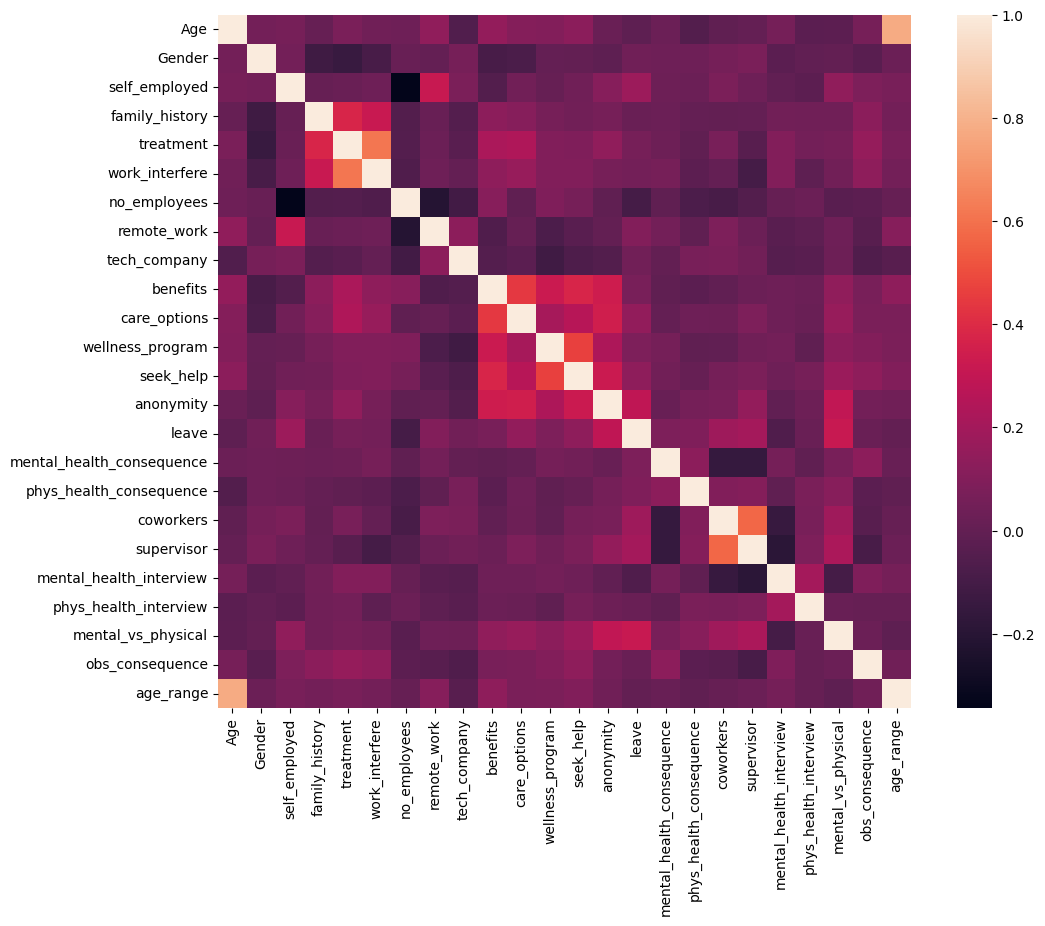

In [15]:

#correlation matrix
corrmat = frame.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=1, square=True);
plt.show()

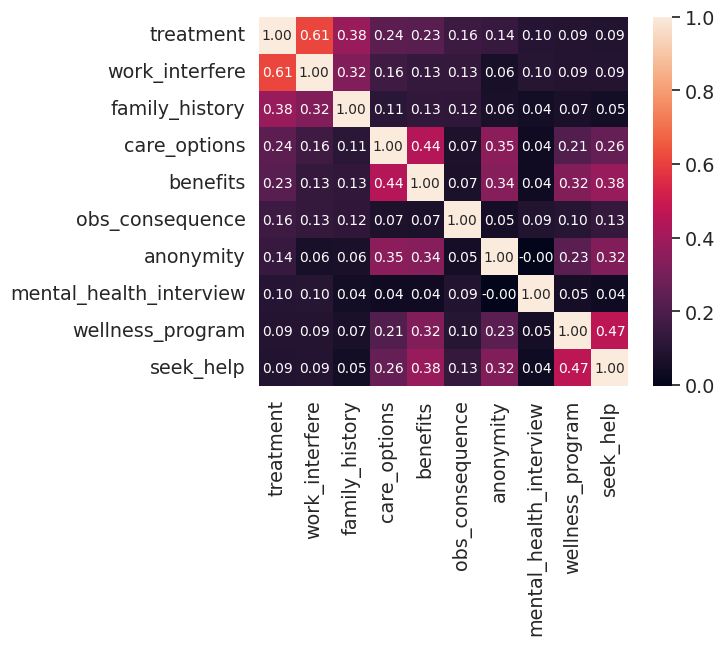

In [16]:
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'treatment')['treatment'].index
cm = np.corrcoef(frame[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

Text(0.5, 16.944444444444436, 'Age')

<Figure size 1200x800 with 0 Axes>

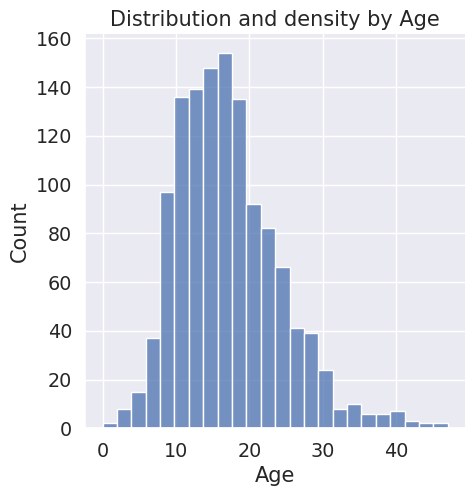

In [17]:
# Distribution and density by Age
plt.figure(figsize=(12,8))
sns.displot(frame["Age"], bins=24)
plt.title("Distribution and density by Age")
plt.xlabel("Age")

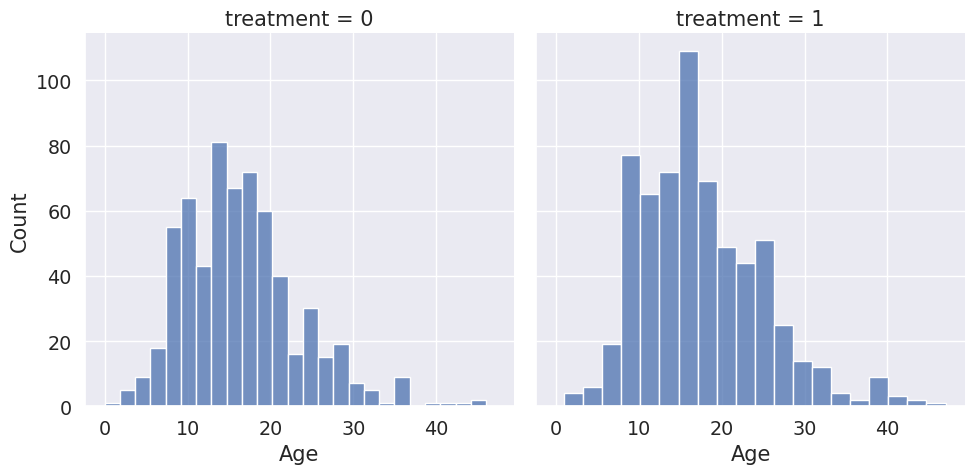

In [18]:
g = sns.FacetGrid(frame, col='treatment', height=5)
g = g.map(sns.histplot, "Age")

<ipython-input-21-f68d7b9e3eb3>:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(labels)


Text(0.5, 1.0, 'Total Distribution by treated or not')

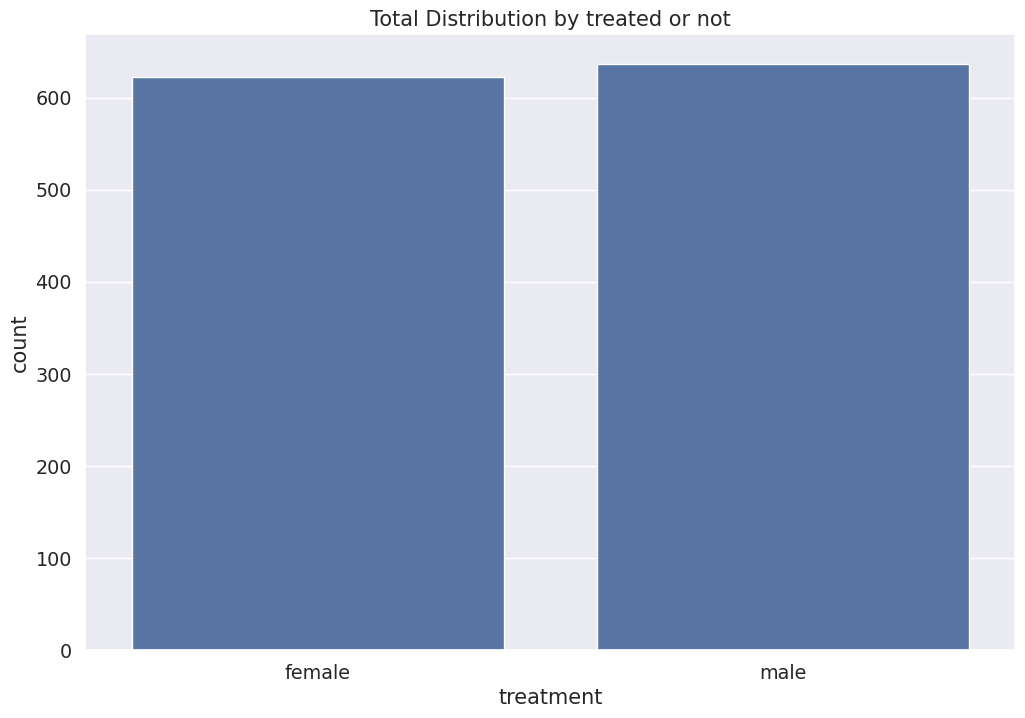

In [21]:

plt.figure(figsize=(12,8))
labels = labelDict['label_Gender']
g = sns.countplot(x="treatment", data=frame)
g.set_xticklabels(labels)

plt.title('Total Distribution by treated or not')

<ipython-input-26-52de8695fd9d>:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.catplot(x="Age", y="treatment", hue="Gender", data=frame, kind="bar", ci=None, height=5, aspect=2, legend_out=True)


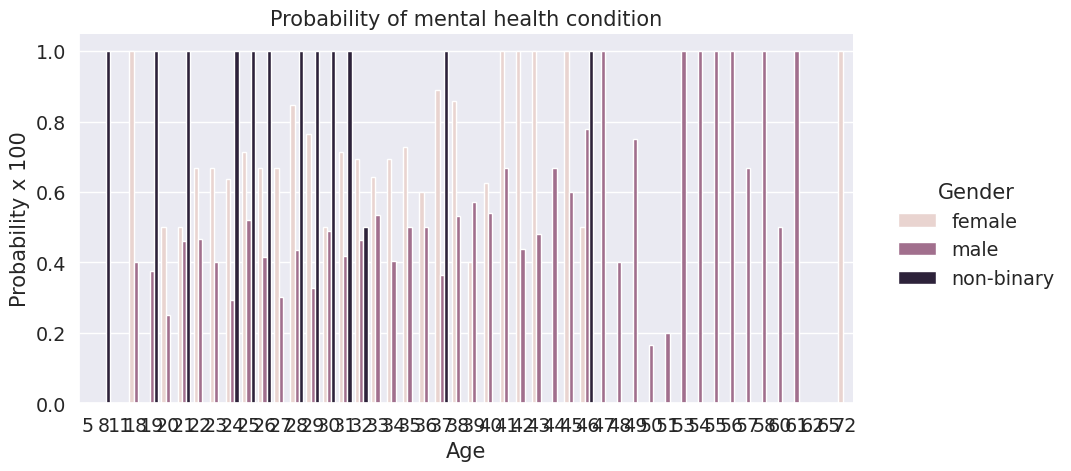

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

o = labelDict['label_Age']

# Use catplot instead of factorplot
g = sns.catplot(x="Age", y="treatment", hue="Gender", data=frame, kind="bar", ci=None, height=5, aspect=2, legend_out=True)
g.set_xticklabels(o)

plt.title('Probability of mental health condition')
plt.ylabel('Probability x 100')
plt.xlabel('Age')

# Replace legend labels
new_labels = labelDict['label_Gender']
for t, l in zip(g._legend.texts, new_labels):
    t.set_text(l)

# Positioning the legend
g.fig.subplots_adjust(top=0.9, right=0.8)

plt.show()
